## Image Processing and Handling 

### Import packages 

In [14]:
from PIL import Image
from pylab import *

### Import Image 

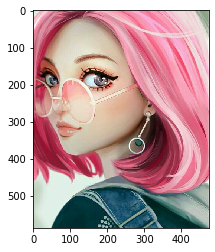

In [2]:
pil_img = Image.open('Desktop/pics/6be62378142564db3fa97f60705d57ac.png')
im = array(pil_img)
imshow(im)

### Convert to grayscale 

In [8]:
grey = Image.open('Desktop/pics/6be62378142564db3fa97f60705d57ac.png').convert('L')
grey.show()

### Create Thumbnails 

In [18]:
pil_img.thumbnail((128,128))

### Copy and Paste regions 

In [25]:
box = [100,100,400,400]
region = grey.crop(box)
region.show()

In [26]:
region = region.transpose(Image.ROTATE_180)
grey.paste(region,box)
grey.show()

### Resize and Rotate  

In [27]:
image = Image.open('Desktop/pics/6be62378142564db3fa97f60705d57ac.png')

In [28]:
out_resize = image.resize((128,128))
out_rotate = image.rotate(45)
out_resize.show()
out_rotate.show()

### Contours and Histograms 

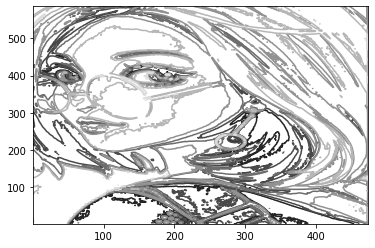

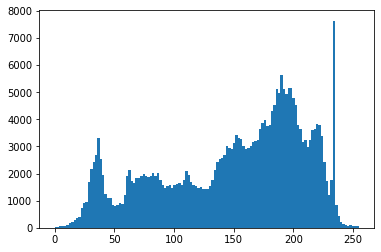

In [31]:
im_grey = array(Image.open('Desktop/pics/6be62378142564db3fa97f60705d57ac.png').convert('L'))
figure()
gray()
contour(im_grey, origin = 'image')
figure()
hist(im_grey.flatten(),128)
show()

### Graylevel Transforms 

In [32]:
from numpy import *

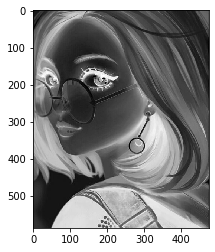

In [34]:
im_invert = 255-im_grey
imshow(im_invert)

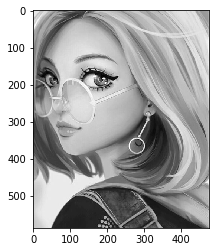

In [35]:
im_clamp = (100.0/255)*im_grey +100
imshow(im_clamp)

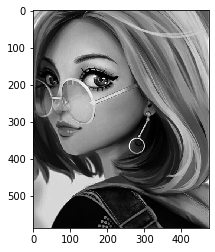

In [36]:
im_squared = 255.0*(im_grey/255.0)**2
imshow(im_squared)

## SciPy 

In [37]:
from scipy.ndimage import filters

### Blurring Images 

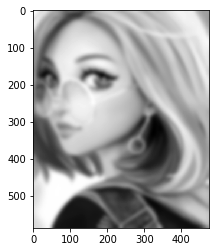

In [40]:
im_grey = array(Image.open('Desktop/pics/6be62378142564db3fa97f60705d57ac.png').convert('L'))
# standard deviation=5
im2 = filters.gaussian_filter(im_grey,5)
imshow(im2)

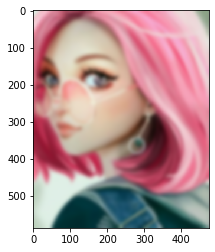

In [42]:
im = array(Image.open('Desktop/pics/6be62378142564db3fa97f60705d57ac.png'))
im3 = zeros((im.shape))
for i in range(3):
    im3[:,:,i] = filters.gaussian_filter(im[:,:,i],5)
im3 = uint8(im3)
imshow(im3)

### Image Derivatives 

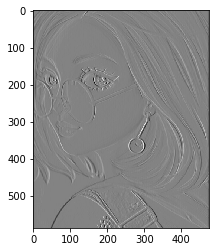

In [44]:
imx = zeros(im_grey.shape)
filters.sobel(im_grey,1,imx)
#filters.gaussian_filter(im_grey, (sigma,sigma), (0,1), imx)
imshow(imx)

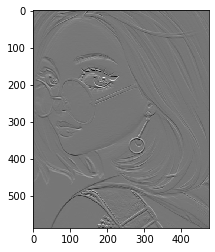

In [45]:
imy = zeros(im_grey.shape)
filters.sobel(im_grey,0,imy)
#filters.gaussian_filter(im_grey, (sigma,sigma), (1,0), imy)
imshow(imy)

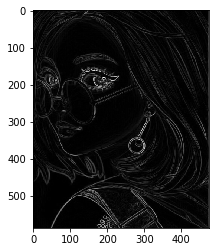

In [46]:
magnitude = sqrt(imx**2 + imy**2)
imshow(magnitude)

### Morphology--Counting Objects 

In [47]:
from scipy.ndimage import measurements, morphology

 Number of objects:  59


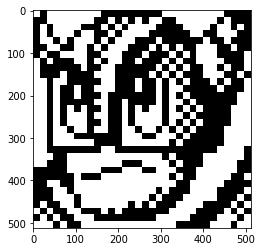

In [48]:
im = array(Image.open('Desktop/pics/unnamed.jpg').convert('L'))
imshow(im)
im = 1*(im<128)

labels, nbr_objects = measurements.label(im)
print(" Number of objects: ", nbr_objects)

Number of objects:  13


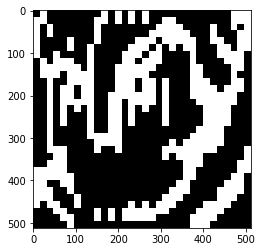

In [50]:
im_open = morphology.binary_opening(im, ones((9,5)), iterations=2)
imshow(im_open)
labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects: ", nbr_objects_open)

### Reading and Writing .mat files

data = scipy.io.loadmat('test.mat')    

//data(dictionary) with keys corresponding to variable names saved in original .mat file.


scipy.io.savemat('test.mat', data) 

//saves dictionary data in .mat file named test.mat

### Saving arrays as images 

from scipy.misc import imsave

imsave('test.jpg', im)

//to save an array im to file

lena = scipy.misc.lena()

//scipy.misc also contains the "Lena" test image